In [131]:
%load_ext autoreload
%autoreload 2

import sys
import os
import sklearn
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE, Isomap, SpectralEmbedding

sys.path.insert(1, os.path.join(sys.path[0], ".."))
from reproduction.pipeline import load as pipeline
from reproduction.analysis import AEData

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
model_dir = "../output/mod09cnn13/"

with open(model_dir + "ae.json", "r") as f:
    ae = tf.keras.models.model_from_json(f.read())
ae.load_weights(model_dir + "ae.h5")

In [39]:
data = AEData(
    dataset=pipeline.load_data(
        data_glob="../data/tif/*.tfrecord",
        shape=(128, 128, 7),
        batch_size=1,
        read_threads=4,
        shuffle_buffer_size=100,
        prefetch=2
    ),
    ae=ae,
    fields=["b%d"%(i+1) for i in range(7)],
    n=1000
)

# PCA Anaysis

In [41]:
data.compute_pca()

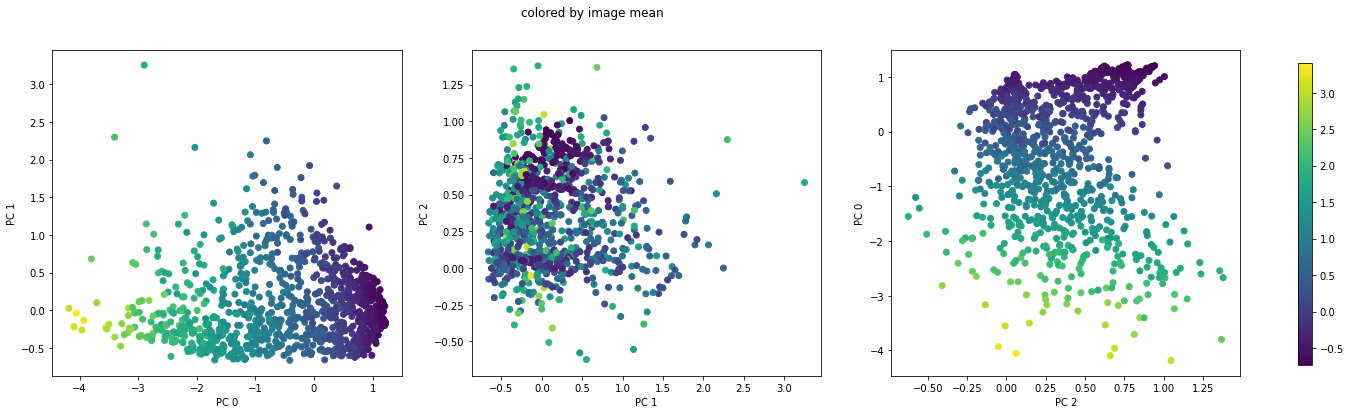

In [88]:
data.plot_pca_projection(data, "colored by image mean", width=6, c=data.imgs.mean(axis=(1,2,3)))

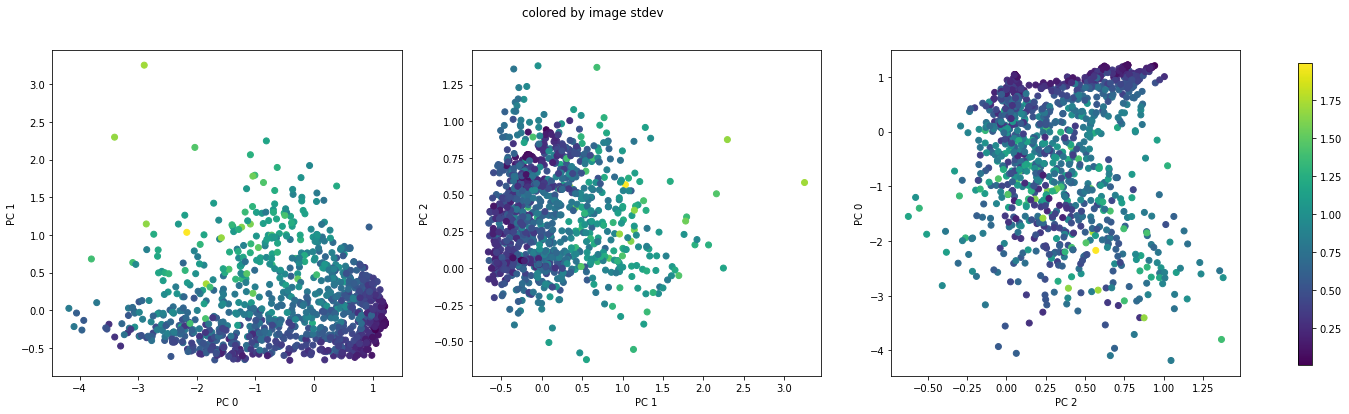

In [89]:
data.plot_pca_projection(data, "colored by image stdev", width=6, c=data.imgs.std(axis=(1,2,3)))

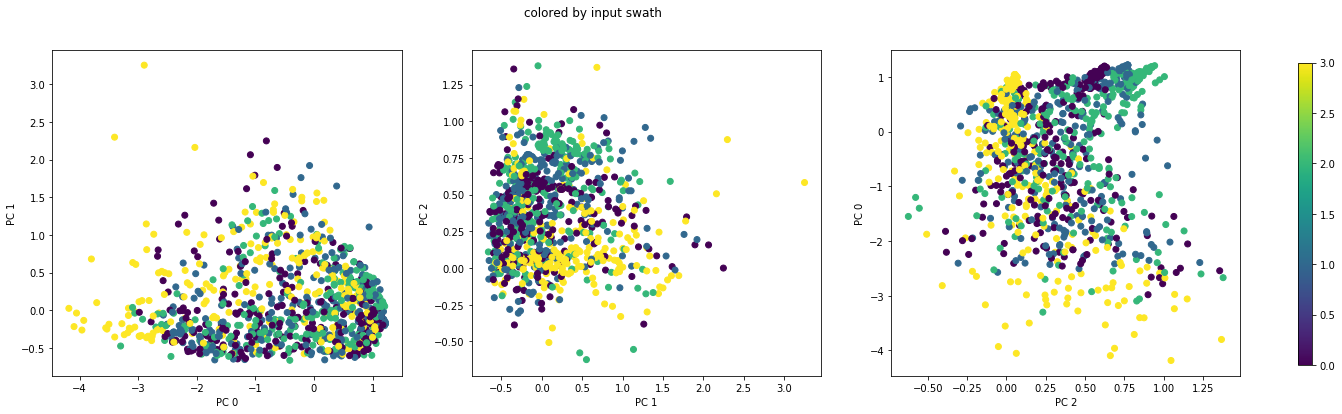

In [90]:
%matplotlib inline
lmap = {n: i for i,n in enumerate(set(data.names))}
label = [lmap[l] for l in data.names] 
data.plot_pca_projection(data, "colored by input swath", width=6, c=label)

In [125]:
def colored_embedding(emb, titles_and_colors, nrows, ncols, width=5):
    fig = plt.figure(figsize=(width * nrows , width * ncols))
    
    for i, (tit, col) in enumerate(titles_and_colors):
        a = fig.add_subplot(nrows, ncols, i+1, projection="3d")
        a.scatter(*emb.T, c=col)
        a.set_title(tit)

<IPython.core.display.Javascript object>


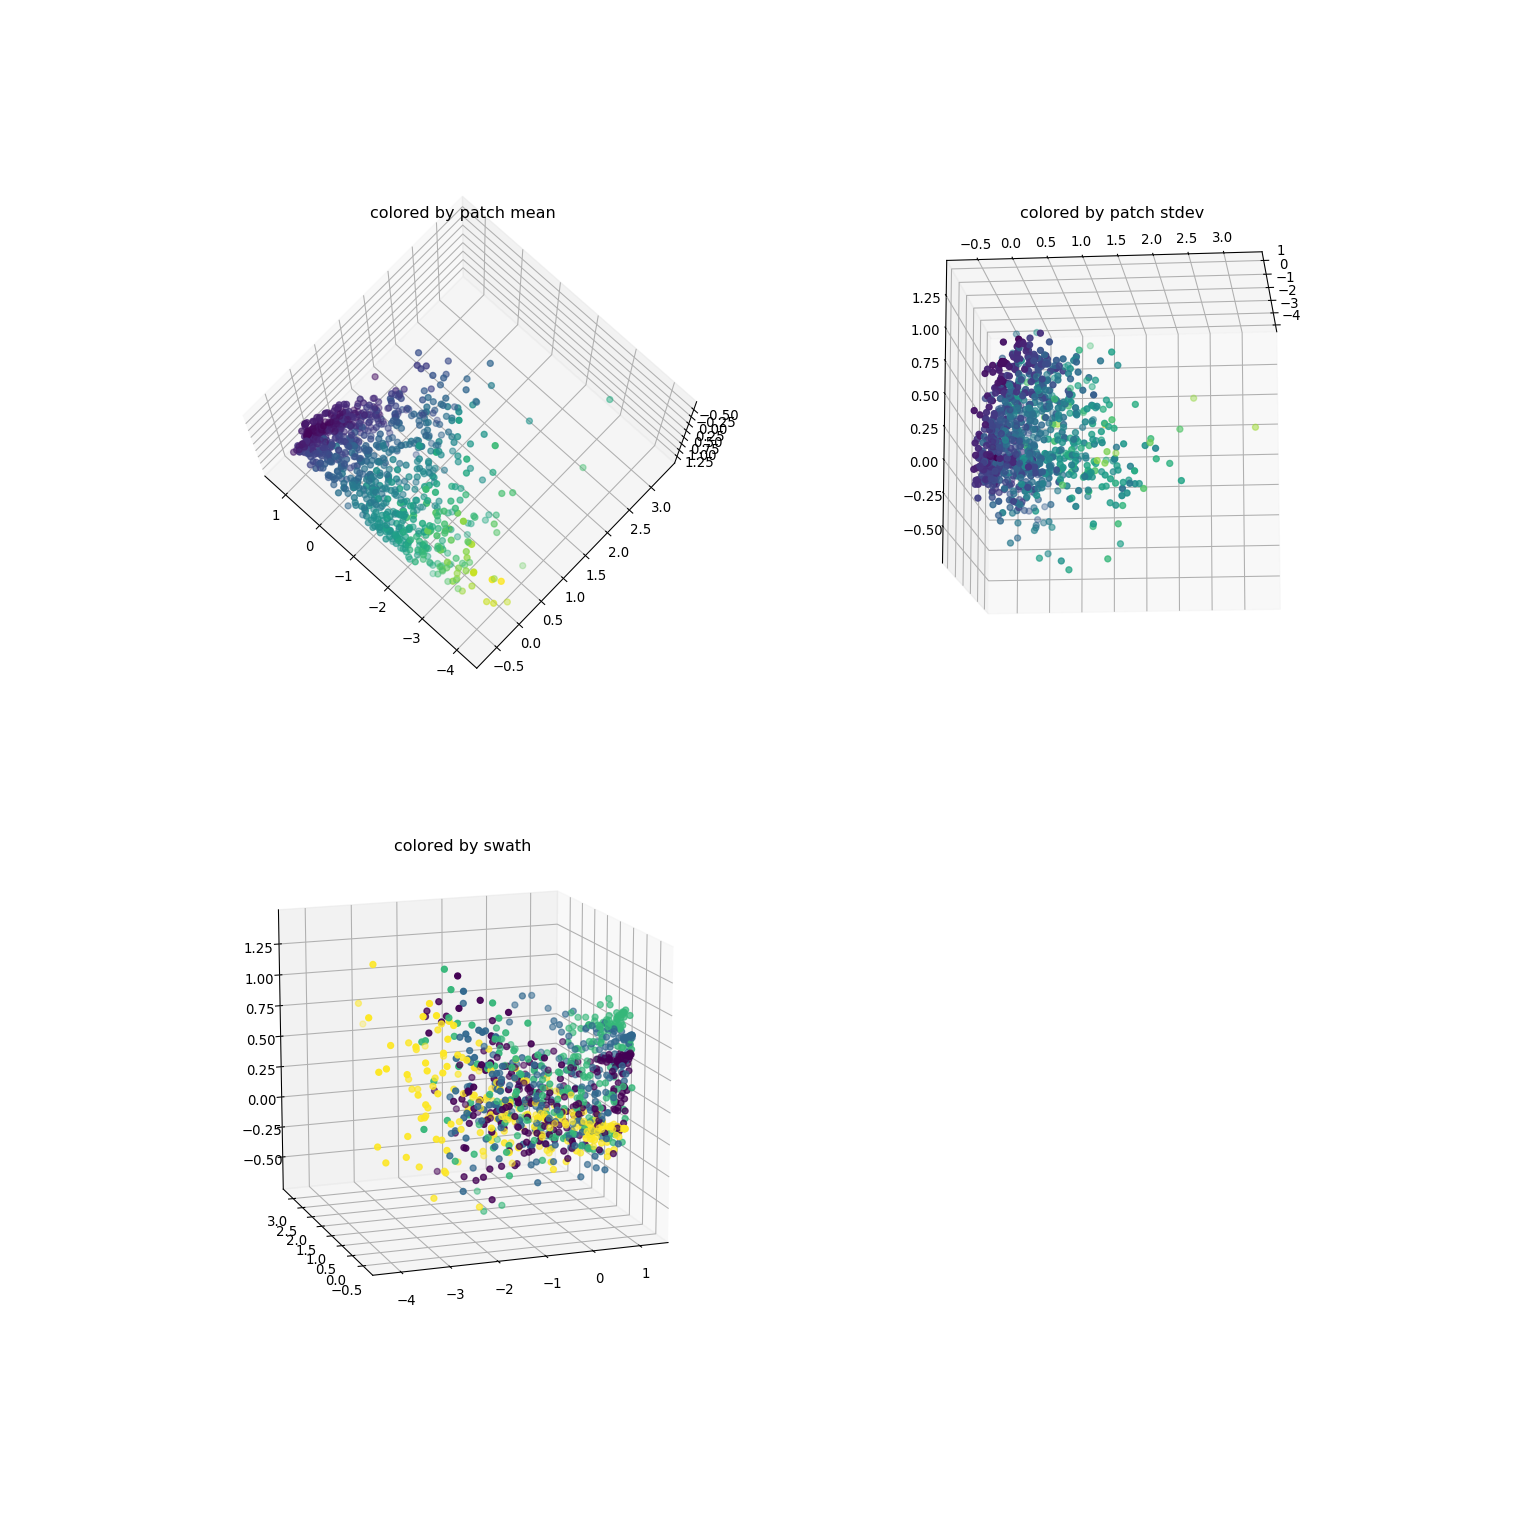

In [140]:

colored_embedding(
    data.pca_project(data).T,
    [
        ("colored by patch mean", data.imgs.mean(axis=(1,2,3))),
        ("colored by patch stdev", data.imgs.std(axis=(1, 2, 3))),
        ("colored by swath", label)
    ],
    width=8,
    nrows=2,
    ncols=2
)

## IsoMap

In [135]:
isomap_emb = Isomap(n_components=3).fit_transform(data.encs)

<IPython.core.display.Javascript object>


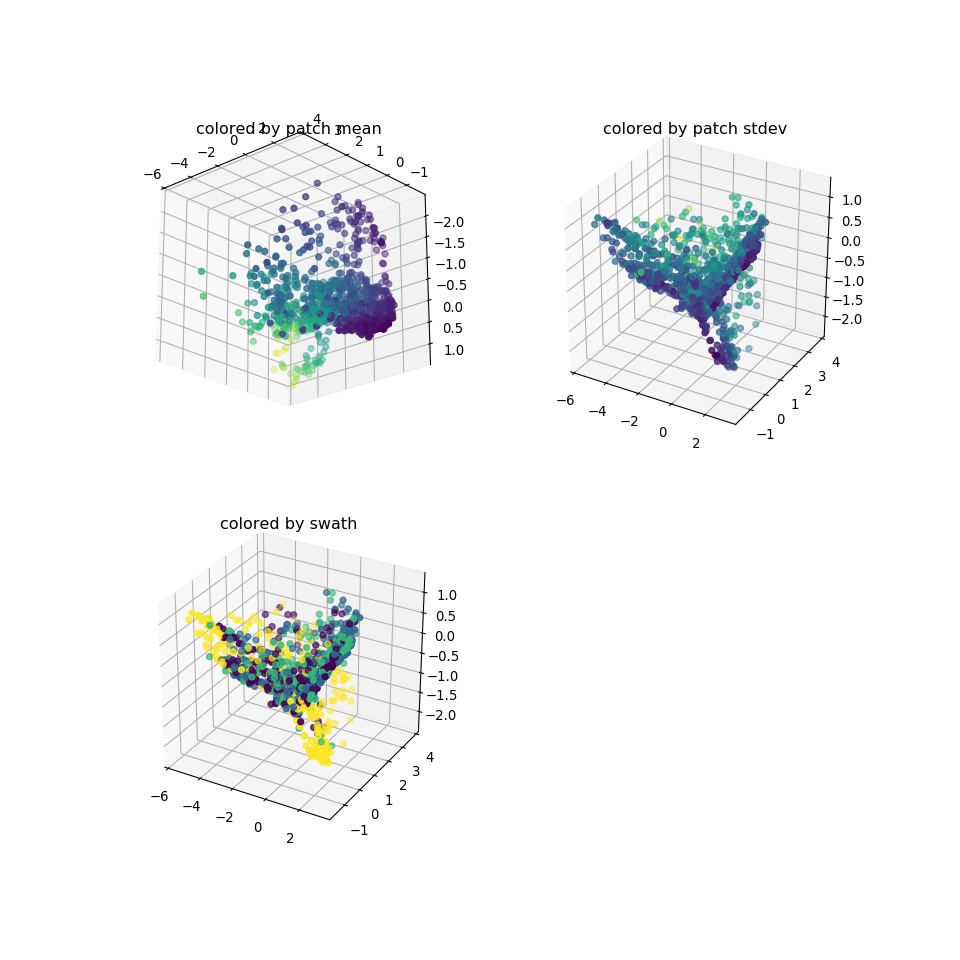

In [141]:
%matplotlib notebook
%matplotlib notebook


colored_embedding(
    isomap_emb,
    [
        ("colored by patch mean", data.imgs.mean(axis=(1,2,3))),
        ("colored by patch stdev", data.imgs.std(axis=(1, 2, 3))),
        ("colored by swath", label)
    ],
    nrows=2,
    ncols=2
)

## TSNE Embedding

In [133]:
tsne_emb = TSNE(n_components=3).fit_transform(data.encs)

<IPython.core.display.Javascript object>


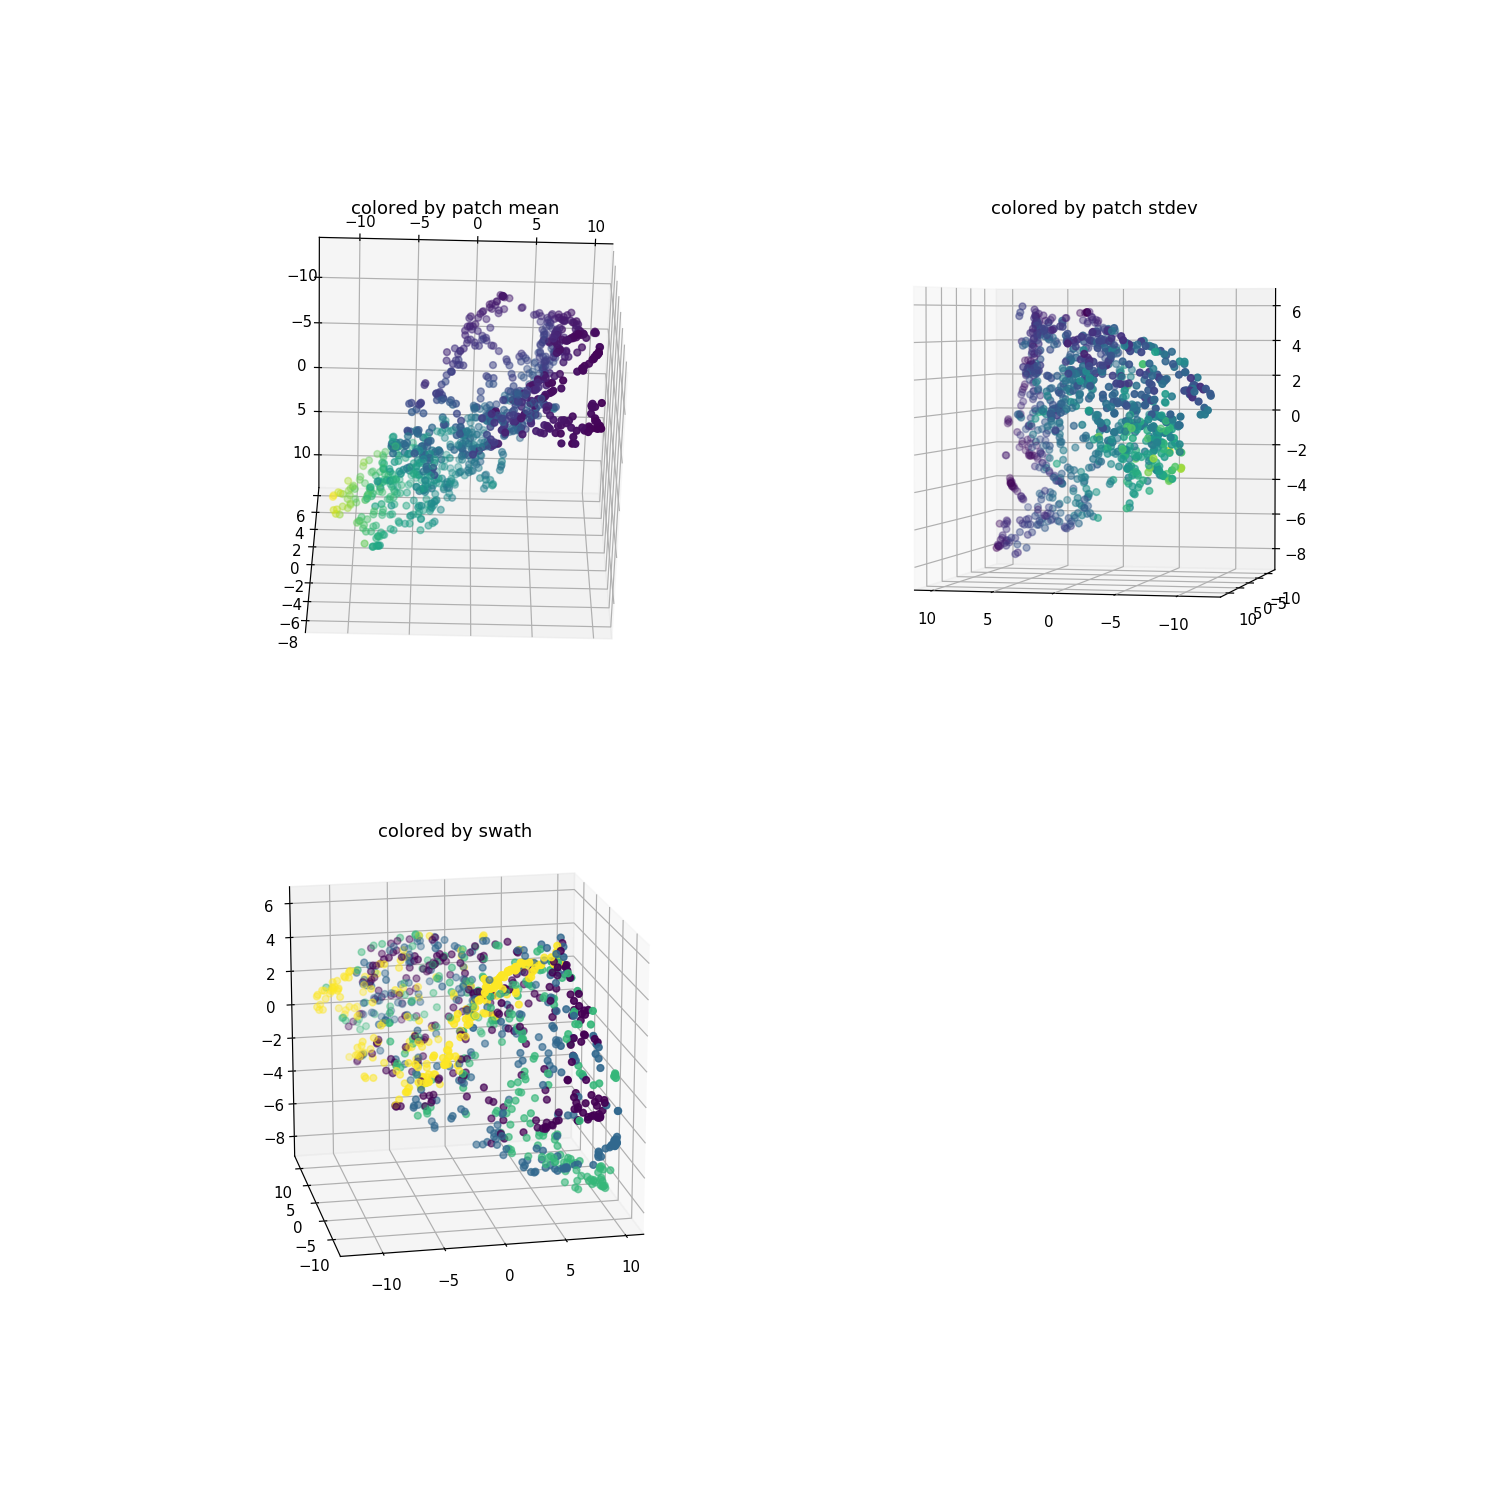

In [134]:
colored_embedding(
    tsne_emb,
    [
        ("colored by patch mean", data.imgs.mean(axis=(1,2,3))),
        ("colored by patch stdev", data.imgs.std(axis=(1, 2, 3))),
        ("colored by swath", label)
    ],
    width=7,
    nrows=2,
    ncols=2
)

## Spectral Embedding

In [138]:
spectral_emb = SpectralEmbedding(n_components=3).fit_transform(data.encs)

<IPython.core.display.Javascript object>


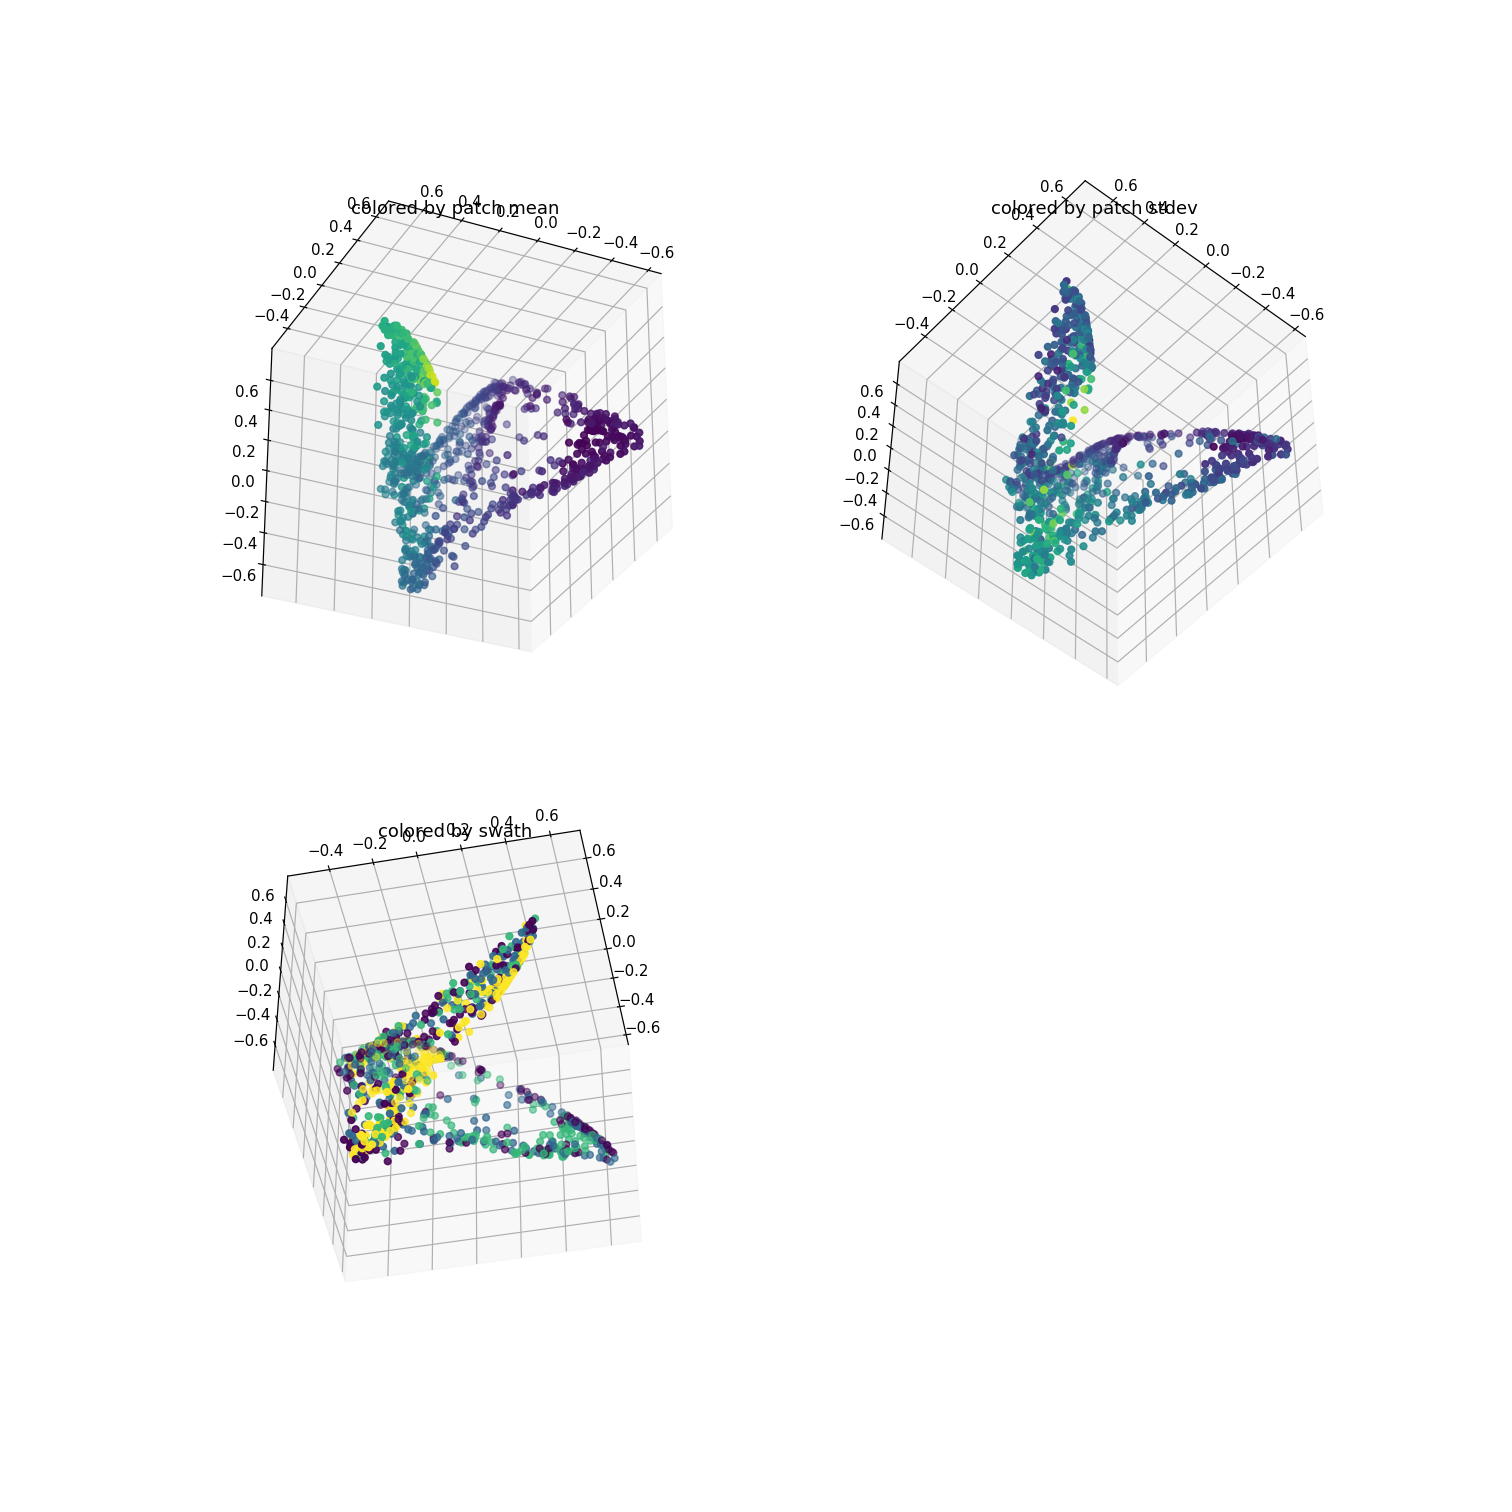

In [139]:
colored_embedding(
    spectral_emb,
    [
        ("colored by patch mean", data.imgs.mean(axis=(1,2,3))),
        ("colored by patch stdev", data.imgs.std(axis=(1, 2, 3))),
        ("colored by swath", label)
    ],
    width=7,
    nrows=2,
    ncols=2
)